In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import matplotlib.pyplot as plt

## Test Multilabel Stratified KFold

In [3]:
df = pd.read_csv("./processed_data/combined_data.csv")
aspects = ["giai_tri","luu_tru","nha_hang","an_uong","di_chuyen","mua_sam"]
label_map = {0:0, 1:1, 2:1, 3:1, 4:1, 5:1}

for i in range(len(aspects)):
    df[f'{aspects[i]}_aspect'] = df[aspects[i]].map(label_map)
kfold = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=0)
folds = df.copy()
targets = folds[aspects].values
for fold, (train_index, val_index) in enumerate(kfold.split(folds, targets)):
    folds.loc[val_index, 'fold'] = fold
folds['fold'] = folds['fold'].astype(int)

In [4]:
train_fold_df = folds[folds['fold'] != 3]
val_fold_df = folds[folds['fold'] == 3]

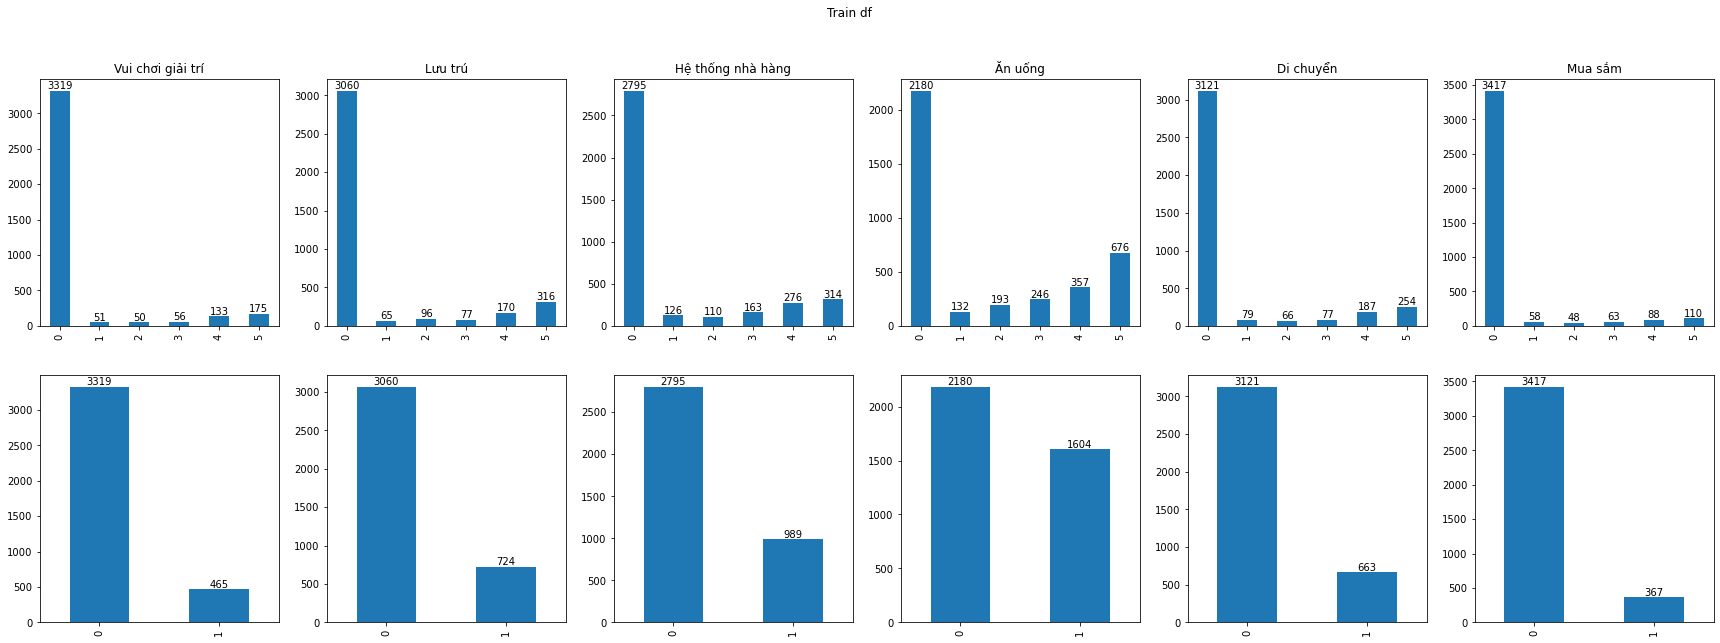

In [5]:
n_train = len(train_fold_df.index)
feature = ["giai_tri", "luu_tru", "nha_hang", "an_uong", "di_chuyen", "mua_sam"]
feature_map = ["Vui chơi giải trí", "Lưu trú", "Hệ thống nhà hàng", "Ăn uống", "Di chuyển", "Mua sắm"]
fig, sub = plt.subplots(2, 6, figsize=(30, 10))

for i in range(6):
    train_fold_df[feature[i]].value_counts().sort_index().plot(kind="bar", ax=sub[0, i])
    sub[0, i].bar_label(sub[0, i].containers[0])
    sub[0, i].set_title(f'{feature_map[i]}')

    train_fold_df[f'{feature[i]}_aspect'].value_counts().sort_index().plot(kind="bar", ax=sub[1, i])
    sub[1, i].bar_label(sub[1, i].containers[0])
fig.suptitle("Train df")
plt.show()

In [13]:
print(724/(724+3060))
print(181/(181+765))

0.19133192389006343
0.19133192389006343


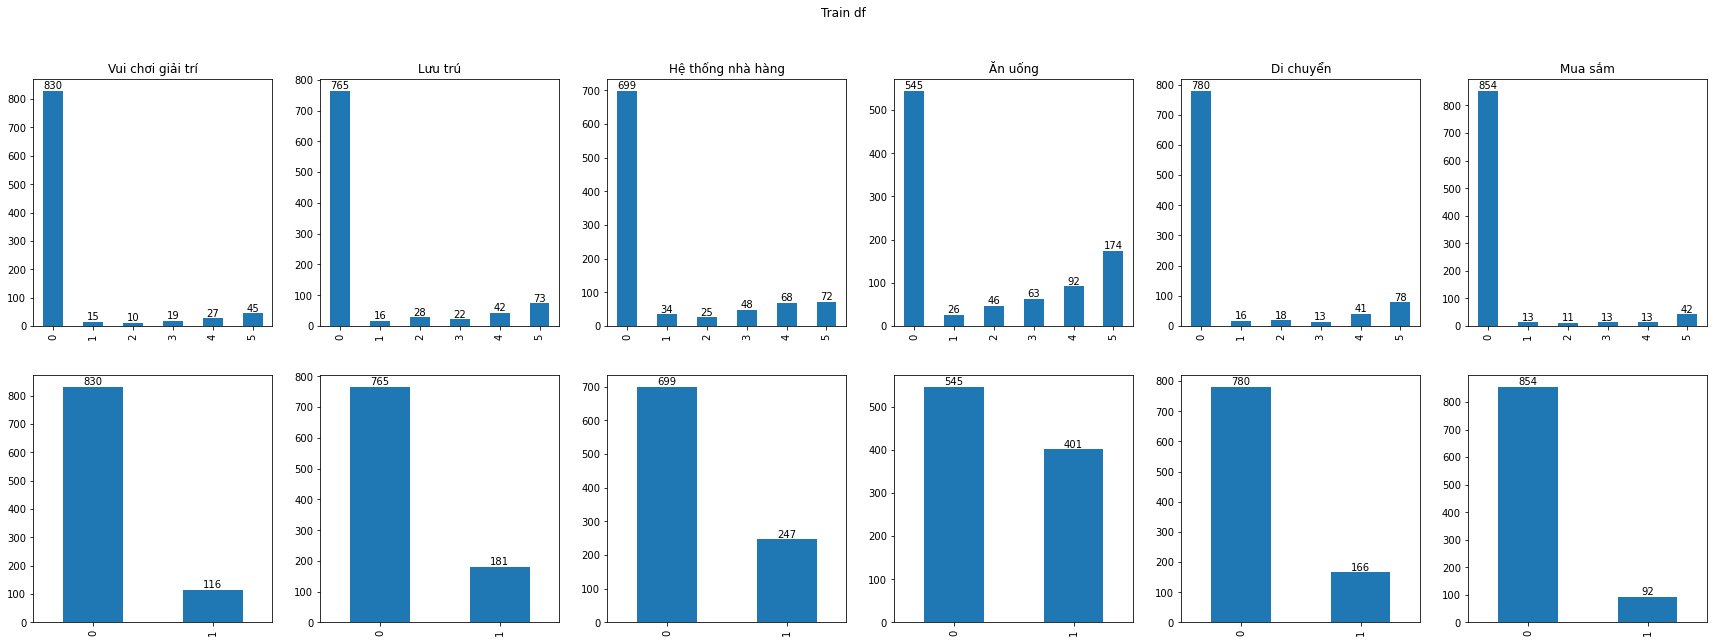

In [6]:
n_train = len(val_fold_df.index)
feature = ["giai_tri", "luu_tru", "nha_hang", "an_uong", "di_chuyen", "mua_sam"]
feature_map = ["Vui chơi giải trí", "Lưu trú", "Hệ thống nhà hàng", "Ăn uống", "Di chuyển", "Mua sắm"]
fig, sub = plt.subplots(2, 6, figsize=(30, 10))

for i in range(6):
    val_fold_df[feature[i]].value_counts().sort_index().plot(kind="bar", ax=sub[0, i])
    sub[0, i].bar_label(sub[0, i].containers[0])
    sub[0, i].set_title(f'{feature_map[i]}')

    val_fold_df[f'{feature[i]}_aspect'].value_counts().sort_index().plot(kind="bar", ax=sub[1, i])
    sub[1, i].bar_label(sub[1, i].containers[0])
fig.suptitle("Train df")
plt.show()

## Test KFold random

In [7]:
df = pd.read_csv("./processed_data/combined_data.csv")
aspects = ["giai_tri","luu_tru","nha_hang","an_uong","di_chuyen","mua_sam"]
label_map = {0:0, 1:1, 2:1, 3:1, 4:1, 5:1}

for i in range(len(aspects)):
    df[f'{aspects[i]}_aspect'] = df[aspects[i]].map(label_map)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
folds = df.copy()
for fold, (train_index, val_index) in enumerate(kfold.split(folds)):
    folds.loc[val_index, 'fold'] = fold
folds['fold'] = folds['fold'].astype(int)

In [8]:
train_fold_df = folds[folds['fold'] != 3]
val_fold_df = folds[folds['fold'] == 3]

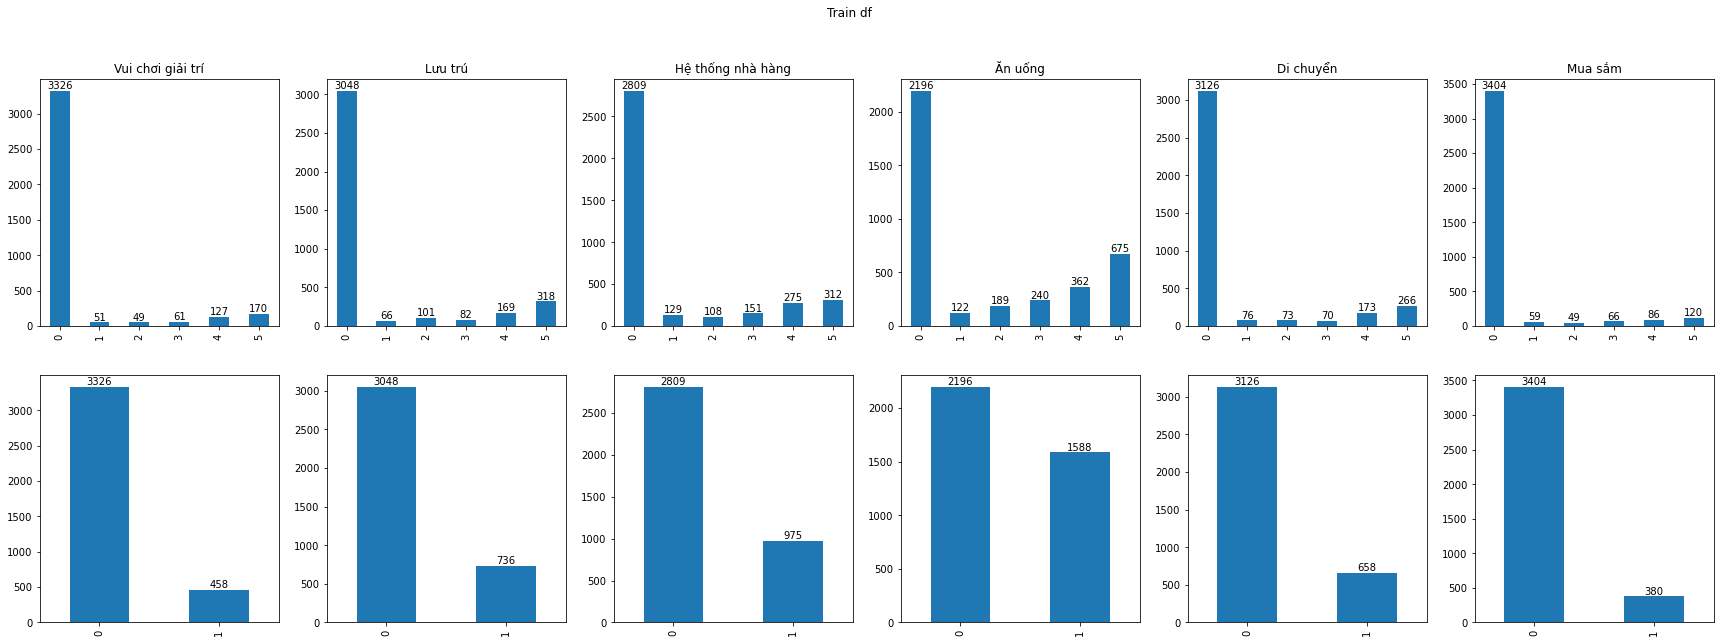

In [9]:
n_train = len(train_fold_df.index)
feature = ["giai_tri", "luu_tru", "nha_hang", "an_uong", "di_chuyen", "mua_sam"]
feature_map = ["Vui chơi giải trí", "Lưu trú", "Hệ thống nhà hàng", "Ăn uống", "Di chuyển", "Mua sắm"]
fig, sub = plt.subplots(2, 6, figsize=(30, 10))

for i in range(6):
    train_fold_df[feature[i]].value_counts().sort_index().plot(kind="bar", ax=sub[0, i])
    sub[0, i].bar_label(sub[0, i].containers[0])
    sub[0, i].set_title(f'{feature_map[i]}')

    train_fold_df[f'{feature[i]}_aspect'].value_counts().sort_index().plot(kind="bar", ax=sub[1, i])
    sub[1, i].bar_label(sub[1, i].containers[0])
fig.suptitle("Train df")
plt.show()

In [14]:
print(736/(736+3048))
print(169/(169+777))

0.1945031712473573
0.17864693446088795


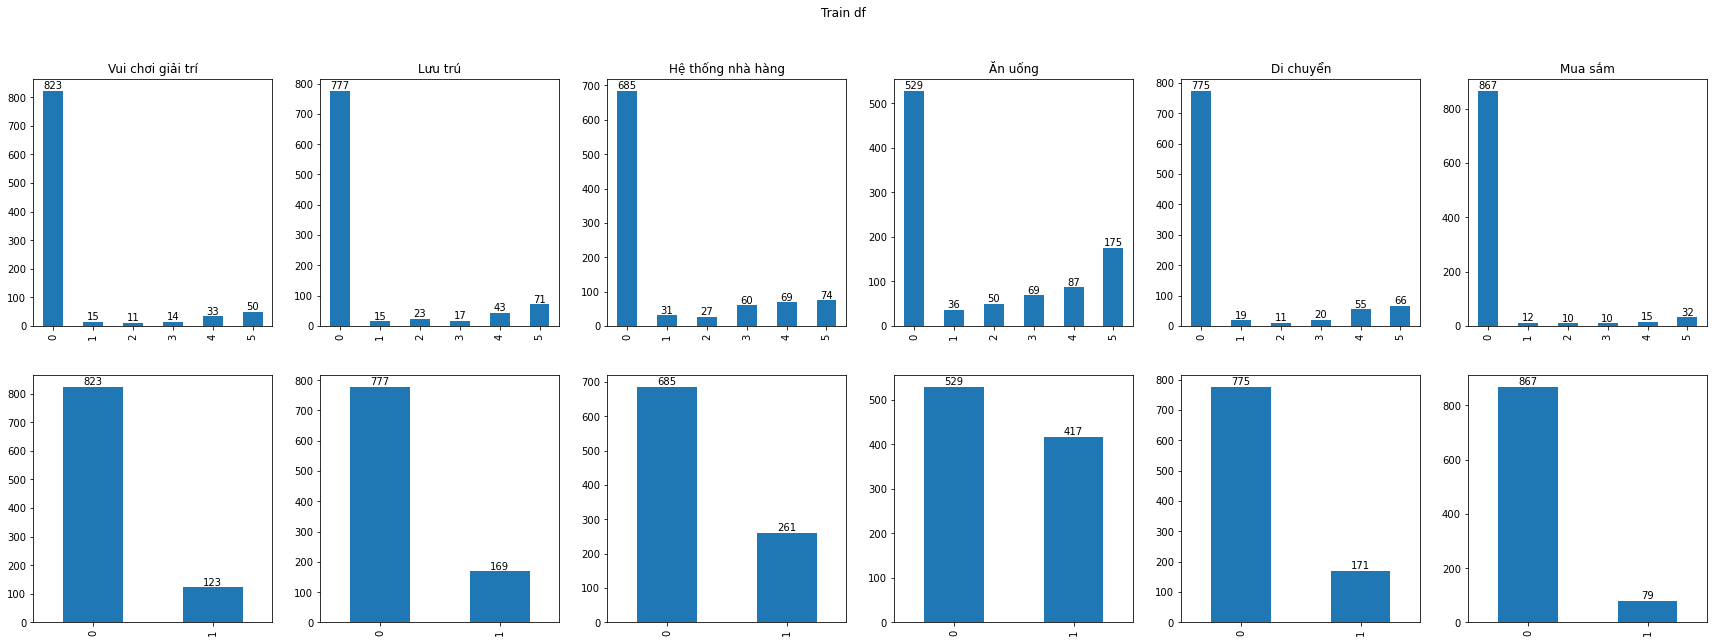

In [10]:
n_train = len(val_fold_df.index)
feature = ["giai_tri", "luu_tru", "nha_hang", "an_uong", "di_chuyen", "mua_sam"]
feature_map = ["Vui chơi giải trí", "Lưu trú", "Hệ thống nhà hàng", "Ăn uống", "Di chuyển", "Mua sắm"]
fig, sub = plt.subplots(2, 6, figsize=(30, 10))

for i in range(6):
    val_fold_df[feature[i]].value_counts().sort_index().plot(kind="bar", ax=sub[0, i])
    sub[0, i].bar_label(sub[0, i].containers[0])
    sub[0, i].set_title(f'{feature_map[i]}')

    val_fold_df[f'{feature[i]}_aspect'].value_counts().sort_index().plot(kind="bar", ax=sub[1, i])
    sub[1, i].bar_label(sub[1, i].containers[0])
fig.suptitle("Train df")
plt.show()